# IPL 2022 Mega Auction Dataset Analysis
<!-- 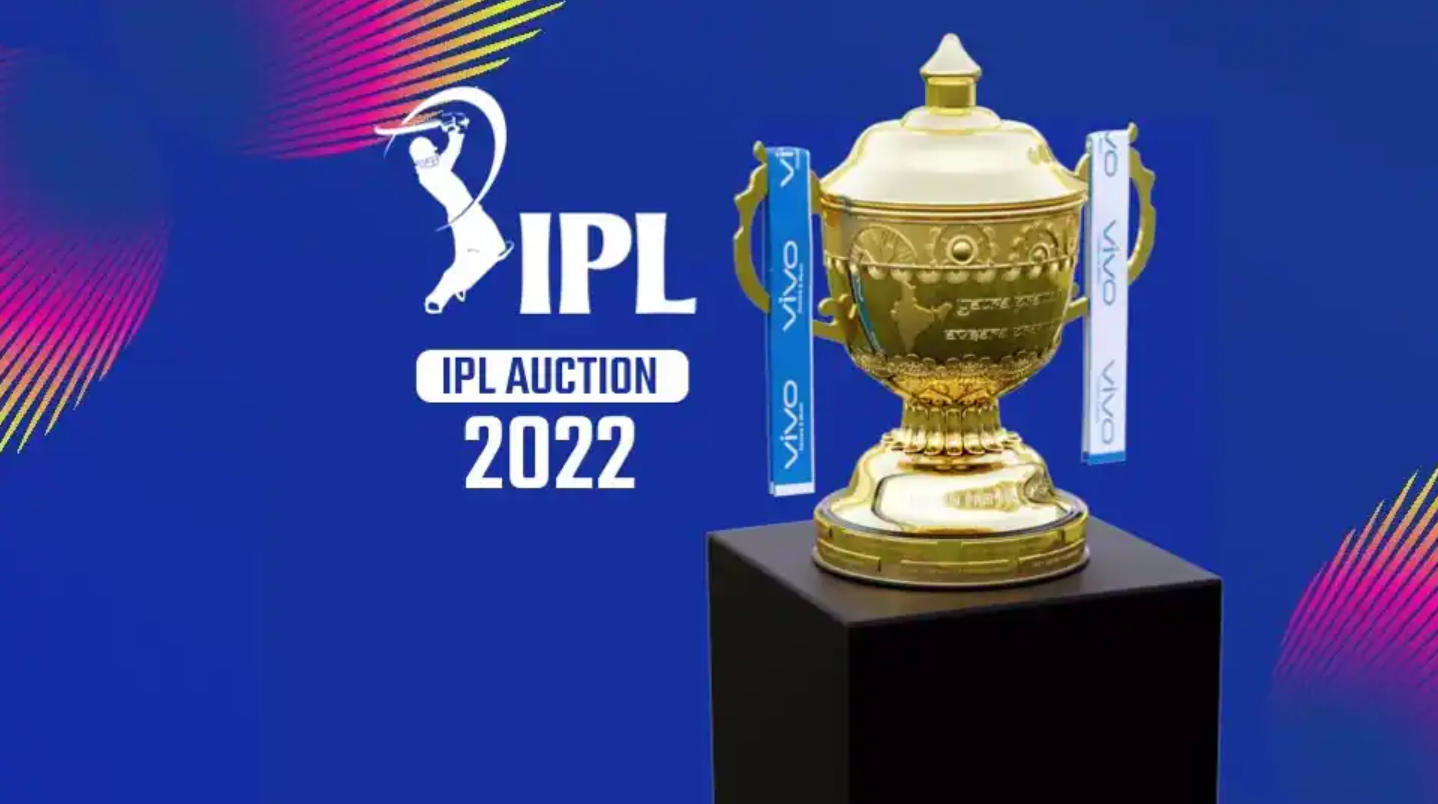 -->
# About IPL:
- The Indian Premier League (IPL) is a Twenty-20 cricket tournament league established with the objective of promoting cricket in India and thereby nurturing young and talented players. The league is an annual event where teams representing different Indian cities compete against each other.
### What is the history of IPL?
- On 13 September 2007, on the back of India's victory at the 2007 T20 World Cup, BCCI announced a franchise-based Twenty20 cricket competition called Indian Premier League. The first season was slated to start in April 2008, in a "high-profile ceremony" in New Delhi.

### What is the process of IPL?
- A group of ten marquee players will be the ones to open the auction. The players in the marquee set will be followed by capped players based on specialisation (batsmen, allrounders, wicketkeeper-batmen, fast bowlers and spinners). After capped players, uncapped players will be brought to the auction for teams to bid.

## Who started IPL cricket?
- Board of Control for Cricket in India - Lalit Mod

--- infomation from Google search

# Let's Begin:---------------------------------------

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [278]:
df = pd.read_csv('../input/ipl-2022-auction-sold-players/IPL2022_Sold_Players.csv')

In [279]:
df.head()

In [280]:
df.shape

In [281]:
df.info()

In [282]:
df['Sold_Price']=df['Sold_Price'].str.replace('[?,]','').astype(int)

In [283]:
df['Sold_Price_CR']=df['Sold_Price'].apply(lambda x: '{:.2f}'.format(x/10000000))

In [284]:
df['Sold_Price_CR']=df['Sold_Price_CR'].astype(float)

In [285]:
df.info()

In [286]:
df.drop(columns='Sold_Price',inplace=True)

In [287]:
df['Teams'].nunique(),df['Player_Name'].nunique()

* ## Total 204 players were sold in different 10 teams

In [288]:
team = df.groupby(by='Teams')

In [289]:
def short_name(string):
    if string == 'Punjab Kings':
        return 'PBKS'
    elif string == 'Chennai Super Kings':
        return 'CSK'
    elif string == 'Kolkata Knight Riders':
        return 'KKR'
    elif string == 'Mumbai Indians':
        return 'MI'
    elif string == 'Rajasthan Royals':
        return 'RR'
    elif string == 'Delhi Capitals':
        return 'DC'
    elif string == 'Gujarat Titans':
        return 'GT'
    elif string == 'Sunrisers Hyderabad':
        return 'SRH'
    elif string == 'Royal Challengers Bangalore':
        return 'RCB'
    elif string == 'Lucknow Super Giants':
        return 'LSG'
    else:
        return None
    
    

In [290]:
df['Teams']=df['Teams'].apply(short_name)

In [291]:
df.sample(5)

In [292]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df['Nationality'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['Nationality'].value_counts().sum())))
plt.title('Nationality vs Player Category')
plt.subplot(122)
df['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['Type'].value_counts().sum())))

# 67% Players are Indians
- 33% are Overseas players
- ### Every 4 out of 3 players are Indians
- ### Every 6 out of 2.5 players are All-Rounders

# No of Players Picked by each Teams

In [293]:
df['Teams'].value_counts()

In [294]:
plt.figure(figsize=(15,5))
plt.title('Players in Team')
sns.barplot(y=team.size().sort_values().values,x=team.size().sort_values().index)
plt.grid()

- PBKS picked highest no of players
- where, LSG picked lowest no of players

In [295]:
pd.crosstab(df['Type'],df['Nationality'])

In [296]:
pd.crosstab(df['Type'],df['Nationality'])

In [297]:
fig = px.imshow(pd.crosstab(df['Nationality'],df['Type']), text_auto=True)
fig.show()

- from India All-Rounder are higher than other cateogry players, same with Overseas players


In [298]:
def num2MB(num):
    '''
        num: int, float
        it will return values like thousands(10K), Millions(10M),Billions(1B)
        '''
    if num < 1000: return int(num)
    if num >= 1000 and num < 1000000:return f'{float("%.1f" %(num/1000))}K'
    elif num>= 1000000 and num < 1000000000: return f'{float("%.1f" %(num/1000000))}M'
    else: return f'{float("%.1f" %(num/1000000000))}B'
    
def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''
    
    total_data = data.shape[0] # total no of rows in data
    
    ax = sns.countplot(data,data2)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)      
        a = height
        x = i.get_x() # get x_axis value
        b = 0
        if val_per == 'value': b = num2MB(a)
        elif val_per == "percent":b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':b = '{}\n{:.2f}%'.format(num2MB(a),(a/total_data)*100)
        else: b = ''
 
        ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None) # shift+tab for more parameter
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)

In [367]:
plt.figure(figsize=(15,5))
myBarPlot(df['Type'],val_per='percent',x_pos=0.3,y_pos=.5,title='Players in Category')

# Nationality vs Teams

In [300]:
pd.crosstab(df['Nationality'],df['Teams'])

In [301]:
sns.clustermap(pd.crosstab(df['Nationality'],df['Type']),figsize=(15,5))

In [302]:
fig = px.imshow(pd.crosstab(df['Nationality'],df['Teams']), text_auto=True)
fig.show()

### Highest and Lowest Indain players in team
- Highest 16 players in PBKS
- Lowest 12 in RCB, SG
### Highest and Lowest Overseas players in team
- Almost eqaul in all teams 6,7

# Player Type vs Teams

In [303]:
fig = px.imshow(pd.crosstab(df['Type'],df['Teams']), text_auto=True)
fig.show()

### Highest Player Bucket
- Highest All-Rounder in PBKS bucket (11)
- Highet Batsman in KKR (7)
- Highest Bowler in RR(10)
- Highest Wicket-Kipper in KKR and SRH(3)
### Lowest Player Bucket
- Lowet All-Rounder in SRH bucket (5)
- Lowest Batsman in PBKS and RCB (2)
- Lowest Bowler in KKR(4)
- Lowest Wicket-Kipper in LSG and RR(1)

In [304]:
plt.figure(figsize=(15,5))
sns.displot(df['Sold_Price_CR'])

# sns.distplot(df['Sold_Price_CR'])

In [305]:
fig = px.histogram(df, x="Sold_Price_CR", nbins=10,title='Sold_Price_CR')
fig.show()

- ### Few players sold in very high price
- ### High no of players sold in low price

In [306]:
team = df.groupby(by='Teams').agg({'Sold_Price_CR':['mean','min','max']})

# Highest and Lowest Pick of Teams by Price

In [307]:
team

In [308]:
sns.heatmap(team)

# Highest spent on a single player by teams in All Category

In [370]:
topP = df.sort_values(by=['Sold_Price_CR'],ascending=False).head(10).sort_values(by='Sold_Price_CR',ascending=False)

In [387]:
fig = px.bar(topP, y='Sold_Price_CR', x='Player_Name',color='Nationality',title='Top 10 High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [310]:
df_nat = df.groupby(by='Nationality')

In [311]:
df_nat.size()

# Top 10 Costly :Indian Players

In [380]:
i = df_nat.get_group('Indian').sort_values(by='Sold_Price_CR',ascending=False).head(10)
i

In [386]:
fig = px.bar(i, y='Sold_Price_CR', x='Player_Name',color='Type',title='Top 10 Indians High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

# Top 10 Costly : International Players

In [313]:
o = df_nat.get_group('Overseas').sort_values(by='Sold_Price_CR',ascending=False).head(10)
o

In [388]:
fig = px.bar(o, y='Sold_Price_CR', x='Player_Name',color='Type',title='Top 10 Overseas High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [314]:
df_type = df.groupby(by='Type')
df_type.size()

# Top 10 Costly: All-Rounders

In [315]:
al = df_type.get_group('All-Rounder').sort_values(by='Sold_Price_CR',ascending=False).head(10)
al

In [389]:
fig = px.bar(al, y='Sold_Price_CR', x='Player_Name',color='Teams',title='Top 10 All-Rounders High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

# Top 10 costly : Batsman

In [316]:
bat = df_type.get_group('Batsman').sort_values(by='Sold_Price_CR',ascending=False).head(10)
bat

In [393]:
fig = px.bar(bat, y='Sold_Price_CR', x='Player_Name',color='Teams',title='Top 10 Batsman High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

# Top 10 costly : Bowlers

In [317]:
bowl = df_type.get_group('Bowler').sort_values(by='Sold_Price_CR',ascending=False).head(10)
bowl

In [394]:
fig = px.bar(bowl, y='Sold_Price_CR', x='Player_Name',color='Teams',title='Top 10 Bowlers High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

# Top 10 Costly Wicket-Keepers

In [318]:
wick = df_type.get_group('Wicket Keeper').sort_values(by='Sold_Price_CR',ascending=False).head(10)
wick

In [395]:
fig = px.bar(wick, y='Sold_Price_CR', x='Player_Name',color='Teams',title='Top 10 Wicket Keepers High Value Players',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [319]:
df_team = df.groupby(by='Teams')
df_team.size()

# Top and Bottom 5 players from every teams

#### 1. CSK

In [320]:
csk = df_team.get_group('CSK').sort_values(by='Sold_Price_CR',ascending=False).head()
csk

In [398]:
fig = px.bar(csk, y='Sold_Price_CR', x='Player_Name',color='Type',title='CSK Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [321]:
csk2 = df_team.get_group('CSK').sort_values(by='Sold_Price_CR',ascending=True).head()
csk2

#### 2. DC

In [322]:
dc = df_team.get_group('DC').sort_values(by='Sold_Price_CR',ascending=False).head()
dc

In [403]:
fig = px.bar(dc, y='Sold_Price_CR', x='Player_Name',color='Type',title='DC Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [323]:
dc2 = df_team.get_group('DC').sort_values(by='Sold_Price_CR',ascending=True).head()
dc2

#### 3. GT

In [324]:
gt = df_team.get_group('GT').sort_values(by='Sold_Price_CR',ascending=False).head()
gt

In [404]:
fig = px.bar(gt, y='Sold_Price_CR', x='Player_Name',color='Type',title='GT Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [325]:
gt2 = df_team.get_group('GT').sort_values(by='Sold_Price_CR',ascending=True).head()
gt2

#### 4. KKR

In [326]:
kkr = df_team.get_group('KKR').sort_values(by='Sold_Price_CR',ascending=False).head()
kkr

In [405]:
fig = px.bar(kkr, y='Sold_Price_CR', x='Player_Name',color='Type',title='KKR Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [327]:
kkr2 = df_team.get_group('KKR').sort_values(by='Sold_Price_CR',ascending=True).head()
kkr2

#### 5.  LSG

In [328]:
lsg = df_team.get_group('LSG').sort_values(by='Sold_Price_CR',ascending=False).head()
lsg

In [406]:
fig = px.bar(lsg, y='Sold_Price_CR', x='Player_Name',color='Type',title='LSG Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [329]:
lsg2 = df_team.get_group('LSG').sort_values(by='Sold_Price_CR',ascending=True).head()
lsg2

#### 6. MI

In [330]:
mi = df_team.get_group('MI').sort_values(by='Sold_Price_CR',ascending=False).head()
mi

In [407]:
fig = px.bar(mi, y='Sold_Price_CR', x='Player_Name',color='Type',title='MI Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [331]:
mi2 = df_team.get_group('MI').sort_values(by='Sold_Price_CR',ascending=True).head()
mi2

#### 7. PBKS

In [332]:
pbks = df_team.get_group('PBKS').sort_values(by='Sold_Price_CR',ascending=False).head()
pbks

In [408]:
fig = px.bar(pbks, y='Sold_Price_CR', x='Player_Name',color='Type',title='PBKS Top Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [333]:
pbks2 = df_team.get_group('PBKS').sort_values(by='Sold_Price_CR',ascending=True).head()
pbks2

#### 8. RCB

In [334]:
rcb = df_team.get_group('RCB').sort_values(by='Sold_Price_CR',ascending=False).head()
rcb

In [409]:
fig = px.bar(rcb, y='Sold_Price_CR', x='Player_Name',color='Type',title='RCB Top 5 Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [335]:
rcb2 = df_team.get_group('RCB').sort_values(by='Sold_Price_CR',ascending=True).head()
rcb2

#### 9. RR

In [336]:
rr = df_team.get_group('RR').sort_values(by='Sold_Price_CR',ascending=False).head()
rr

In [410]:
fig = px.bar(rr, y='Sold_Price_CR', x='Player_Name',color='Type',title='RR Top 5 Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [337]:
rr2 = df_team.get_group('RR').sort_values(by='Sold_Price_CR',ascending=True).head()
rr2

#### 10. SRH

In [338]:
srh = df_team.get_group('SRH').sort_values(by='Sold_Price_CR',ascending=False).head()
srh

In [412]:
fig = px.bar(srh, y='Sold_Price_CR', x='Player_Name',color='Type',title='SRH Top 5 Pick',labels={'Player_Name':'Player Name','Sold_Price_CR':'Price in Cr'})
fig.show()

In [339]:
srh2 = df_team.get_group('SRH').sort_values(by='Sold_Price_CR',ascending=True).head()
srh2

In [340]:
df_team = df.groupby(by='Teams')
df_team.size()

In [341]:
df['Nation_cat']= df['Nationality'].apply(lambda x: 1 if x=='Indian' else 0)
df['Type_cat']= df['Type'].apply(lambda x: 1 if x=='All-Rounder' else (2 if x=='Batsman' else (3 if x == 'Bowler' else 4)))
df['Team_cat']= df['Teams'].apply(lambda x: 0 if x=='CSK' else (1 if x=='DC' else (2 if x == 'GT' else (3 if x=='KKR' else (4 if x=='LSG' else (5 if x == 'MI' else (6 if x=='PBKS' else (7 if x == 'RCB' else (8 if x=='RR' else 9)))))))))

In [342]:
df['Nation_cat'].value_counts()

In [343]:
df.head()

In [344]:

# fig = px.line(df, x="year", y="lifeExp", color='country')
# fig.show()

# Extracting top 10 price list by player type and storing in new df

In [345]:
al2 = al['Sold_Price_CR'].reset_index(drop=True)
bat2 = bat['Sold_Price_CR'].reset_index(drop=True)
bowl2 = bowl['Sold_Price_CR'].reset_index(drop=True)
wick2 = wick['Sold_Price_CR'].reset_index(drop=True)
o2 = o['Sold_Price_CR'].reset_index(drop=True)
i2 = i['Sold_Price_CR'].reset_index(drop=True)

typed = {'Indian':i2,'Overseas':o2,'All-Rounder':al2,'Batsman':bat2,'Bowler':bowl2,'Wicket-Keeper':wick2}
type_d = pd.concat(typed, axis = 1)
type_d

In [346]:
z = np.arange(1,20)

In [416]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=i2, y=z,mode='lines+markers', name='Indian',line_shape='linear'))
fig.add_trace(go.Scatter(x=o2, y=z,mode='lines+markers', name='Overseas'))
fig.add_trace(go.Scatter(x=al2, y=z,mode='lines', name='All-Rounder',line_shape='linear'))
fig.add_trace(go.Scatter(x=bat2, y=z,mode='lines', name='Batsman'))
fig.add_trace(go.Scatter(x=bowl2, y=z,mode='lines', name='Bowler'))
fig.add_trace(go.Scatter(x=wick2, y=z,mode='lines', name='Wicket-Keeper'))


# fig.add_trace(go.Scatter(x=z, y=b,                    mode='lines+markers',                    name='lines+markers'))
# fig.add_trace(go.Scatter(x=z, y=c,                    mode='markers', name='markers'))

fig.show()

In [348]:
a = csk['Sold_Price_CR'].reset_index(drop=True)
b = dc['Sold_Price_CR'].reset_index(drop=True)
c = gt['Sold_Price_CR'].reset_index(drop=True)
d = kkr['Sold_Price_CR'].reset_index(drop=True)
e = lsg['Sold_Price_CR'].reset_index(drop=True)
f = mi['Sold_Price_CR'].reset_index(drop=True)
g = pbks['Sold_Price_CR'].reset_index(drop=True)
h = rcb['Sold_Price_CR'].reset_index(drop=True)
i = rr['Sold_Price_CR'].reset_index(drop=True)
j = srh['Sold_Price_CR'].reset_index(drop=True)
data = {'CSK':a, 'DC':b, 'GT':c, 'KKR':d, 'LSG':e, 'MI':f, 'PBKS':g, 'RCB':h, 'RR':i, 'SRH':j}
df3 = pd.concat(data, axis = 1)
df3

# Top 5 High picks by Teams :Line chart
- X-axis: Sold Price in Crore
- Y-axis: No of Players

In [350]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=a, y=z,mode='lines', name='CSK',line_shape='linear'))
fig.add_trace(go.Scatter(x=b, y=z,mode='lines', name='DC'))
fig.add_trace(go.Scatter(x=c, y=z,mode='lines', name='GT'))
fig.add_trace(go.Scatter(x=d, y=z,mode='lines+markers', name='KKR'))
fig.add_trace(go.Scatter(x=e, y=z,mode='lines', name='LSG'))
fig.add_trace(go.Scatter(x=f, y=z,mode='lines', name='MI'))
fig.add_trace(go.Scatter(x=g, y=z,mode='lines+markers', name='PBKS'))
fig.add_trace(go.Scatter(x=h, y=z,mode='lines', name='RCB',line_shape='linear'))
fig.add_trace(go.Scatter(x=i, y=z,mode='lines', name='RR'))
fig.add_trace(go.Scatter(x=j, y=z,mode='lines', name='SRH'))

# fig.add_trace(go.Scatter(x=z, y=b,                    mode='lines+markers',                    name='lines+markers'))
# fig.add_trace(go.Scatter(x=z, y=c,                    mode='markers', name='markers'))

fig.show()

In [351]:
a = np.arange(204)

In [352]:

fig = px.scatter( x=df['Sold_Price_CR'], y=df['Type_cat'], size=df['Sold_Price_CR'], color=df['Teams'], hover_name=df['Teams'], log_x=True, size_max=60,title='Player Type vs Sold Price')
fig.show()

# Team vs Sold_Price

In [353]:
fig = px.scatter( x=df['Sold_Price_CR'], y=df['Team_cat'], size=df['Sold_Price_CR'], color=df['Teams'], hover_name=df['Teams'], log_x=True, size_max=60)
fig.show()

# Team vs Type vs Sold Price

In [354]:
fig = px.scatter( x=df['Team_cat'], y=df['Type_cat'], size=df['Sold_Price_CR'], color=df['Teams'], hover_name=df['Teams'], log_x=True, size_max=60)
fig.show()

# Team vs Nationaltiy vs Sold Price

In [355]:
fig = px.scatter( x=df['Team_cat'], y=df['Sold_Price_CR'], size=df['Nation_cat'], color=df['Teams'],symbol=df['Type'], hover_name=df['Teams'], log_x=True, size_max=60)
fig.show()

# Team vs Player

In [356]:
fig = px.box(df, x="Nationality", y="Sold_Price_CR",color=df['Type'],title='Five Point Summery: Player vs Type')
fig.show()

In [357]:
fig = px.box(df, x="Nationality", y="Sold_Price_CR",color=df['Teams'],title='Five Point Summery: Player vs Teams vs Nationality')
fig.show()

In [358]:
df['Teams'].unique()

# Extracting the team wise data
- this  can be done using groupby fn as well, this one easy

In [359]:
csk_squad = df[df['Teams']=='CSK'].sort_values(by='Type')
dc_squad = df[df['Teams']=='DC'].sort_values(by='Type')
gt_squad = df[df['Teams']=='GT'].sort_values(by='Type')
kkr_squad = df[df['Teams']=='KKR'].sort_values(by='Type')
lsg_squad = df[df['Teams']=='LSG'].sort_values(by='Type')
mi_squad = df[df['Teams']=='MI'].sort_values(by='Type')
pbks_squad = df[df['Teams']=='PBKS'].sort_values(by='Type')
rcb_squad = df[df['Teams']=='RCB'].sort_values(by='Type')
rr_squad = df[df['Teams']=='RR'].sort_values(by='Type')
srh_squad = df[df['Teams']=='SRH'].sort_values(by='Type')


# Players Picked by each Teams category wise

In [360]:
plt.figure(figsize=(15,15))
plt.subplot(431)
csk_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(csk_squad['Type'].value_counts().sum())))
plt.title('CSK Players')
plt.subplot(432)
dc_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(dc_squad['Type'].value_counts().sum())))
plt.title('DC Players')
plt.subplot(433)
gt_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(gt_squad['Type'].value_counts().sum())))
plt.title('GT Players')

plt.subplot(434)
kkr_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(kkr_squad['Type'].value_counts().sum())))
plt.title('KKR Players')
plt.subplot(435)
lsg_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(lsg_squad['Type'].value_counts().sum())))
plt.title('LSG Players')
plt.subplot(436)
mi_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(mi_squad['Type'].value_counts().sum())))
plt.title('MI Players')

plt.subplot(437)
pbks_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(pbks_squad['Type'].value_counts().sum())))
plt.title('PBKS Players')
plt.subplot(438)
rcb_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(rcb_squad['Type'].value_counts().sum())))
plt.title('RCB Players')
plt.subplot(439)
rr_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(rr_squad['Type'].value_counts().sum())))
plt.title('RR Players')

plt.subplot(4,3,11)
srh_squad['Type'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(srh_squad['Type'].value_counts().sum())))
plt.title('SRH Players')


# Extracting Total values spent by Teams

In [361]:
ls = [csk_squad,dc_squad,gt_squad,kkr_squad,lsg_squad,mi_squad,pbks_squad,rcb_squad,rr_squad,srh_squad]
tm_ls = []
tm_am = []
for i in ls:
    name = i['Teams'].unique().tolist()[0]
    amt= float('{:.2f}'.format(i['Sold_Price_CR'].sum()))
    tm_ls.append(name)
    tm_am.append(amt)
# print(tm_ls,tm_am)
new = pd.DataFrame({'Team':tm_ls,'Amount':tm_am})
new


In [1]:
fig = px.bar(new, x='Team', y='Amount',color='Team',title='Total Amount Spent by Teams')
fig.show()

# Extracting the Player Types for every Teams
- to analys the how many types and the % in each team

In [363]:
z_team = [csk_squad,dc_squad,gt_squad,kkr_squad,lsg_squad,mi_squad,pbks_squad,rcb_squad,rr_squad,srh_squad]
z = []

for i in z_team:
    c = i.groupby(by='Type')
    clst = [float('{:.2f}'.format(c.get_group('All-Rounder')['Sold_Price_CR'].sum())),
    float('{:.2f}'.format(c.get_group('Batsman')['Sold_Price_CR'].sum())),
    float('{:.2f}'.format(c.get_group('Bowler')['Sold_Price_CR'].sum())),
    float('{:.2f}'.format(c.get_group('Wicket Keeper')['Sold_Price_CR'].sum()))]
    clst
    ccat = ['All-Rounder', 'Batsman', 'Bowler', 'Wicket Keeper']
    ca = pd.DataFrame({'Type':ccat,'Amount':clst})
    z.append(ca)

In [364]:
df['Teams'].unique()

In [1]:
### printing the pie chart by player category for each teams

In [365]:
# fig = px.pie(ca, values='Amount', names='Type')
b = ['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PBKS', 'RR', 'RCB', 'SRH']
for i in range(0,10):
    fig = go.Figure(data=[go.Pie(labels=z[i]['Type'], values=z[i]['Amount'],textinfo='label+percent',title='{} Spent on Players'.format(b[i]),
                                 insidetextorientation='radial'
                                )])
    fig.show()

# Conclusion:

- Total Spent Amount: 551.7Cr
    - Spent by Teams:
        0.	CSK	  : 45.05 Cr
        1.	DC	  : 47.40 Cr
        2.	GT	  : 51.85 Cr
        3.	KKR	  : 47.55 Cr
        4.	LSG	  : 59.00 Cr
        5.	MI	  : 47.90 Cr
        6.	PBKS  : 68.55 Cr
        7.	RCB	  : 55.45 Cr
        8.	RR	  : 61.05 Cr
        9.	SRH	  : 67.90 Cr
     
### Highest Player Pick by Teams
- Highest All-Rounder in PBKS bucket (11)
- Highet Batsman in KKR (7)
- Highest Bowler in RR(10)
- Highest Wicket-Kipper in KKR and SRH(3)
### Lowest Player Pick by Teams
- Lowet All-Rounder in SRH bucket (5)
- Lowest Batsman in PBKS and RCB (2)
- Lowest Bowler in KKR(4)
- Lowest Wicket-Kipper in LSG and RR(1)

#### Top 3 players:
- Ishan Kishan, Deepak Chahar and Shreyash Iyar

### Top in each Category:
- All-Rounder: Liam Livingstone(PBKS- 11.5 Cr)
- Batsman: Shreyash Iyer (KKR- 12.25 Cr)
- Bowler: Deepak Chahar(CSK- 14Cr)
- Wicket-Keeper: Ishan Kishan(MI- 15.25 Cr)

### Top 3 Team's Highest Pick:
- Mi -  15.25 Cr
- CSK - 14 Cr
- KKR - 12.25 Cr


        

That's all!!!!
Well it's little bit lengthy code but quite inreseting facts came after this analysis.
- Many challenges came across while doing this analysis which excites me to learn more.

## What you do, now?
- try your knowledge to get more details from this data.
- Go in-depth of every small points.
- Feel free to Copy or Edit this notebook


#### Pls do upvotes, write your views/ideas/suggetions in discussion.
#### Lastly, pls follow me, do visit my account and share this notebook as much possible.

#### Thanks a lot to reading till last.
Good Luck!!!!